In [1]:
import pandas as pd

In [12]:
m5_input_path = "/ssd003/projects/forecasting_bootcamp/bootcamp_datasets/m5-forecasting-accuracy"
sell_price = pd.read_csv(f'{m5_input_path}/sell_prices.csv')
calendar = pd.read_csv(f'{m5_input_path}/calendar.csv')
#train = pd.read_csv(f'{m5_input_path}/sales_train_evaluation.csv').set_index('id')
sample_sub = pd.read_csv(f'{m5_input_path}/sample_submission.csv')

In [9]:
main_df = pd.read_csv('M5_main_df.csv', parse_dates=['date']).set_index('date')

In [11]:
product_sales = pd.read_csv('M5_product_sales.csv', parse_dates=['date']).set_index('date')

In [10]:
main_df.head()

,all,CA,TX,WI,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,...,FOODS,HOBBIES,HOUSEHOLD,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,32631,14195,9438,8998,4337,3494,4739,1625,2556,3852,...,23178,3764,5689,2343,4094,16741,3610,154,4105,1584
2011-01-30,31749,13805,9630,8314,4155,3046,4827,1777,2687,3937,...,22758,3357,5634,2216,4209,16333,3172,185,3858,1776
2011-01-31,23783,10108,6778,6897,2816,2121,3785,1386,1822,2731,...,17174,2682,3927,1657,3174,12343,2497,185,2827,1100
2011-02-01,25412,11047,7381,6984,3051,2324,4232,1440,2258,2954,...,18878,2669,3865,1508,3606,13764,2531,138,2732,1133
2011-02-02,19146,9925,5912,3309,2630,1942,3817,1536,1694,2492,...,14603,1814,2729,1209,2869,10525,1714,100,1802,927


In [13]:
product_sales.head()

,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [79]:
cols = ['HOBBIES', 'FOODS', 'HOUSEHOLD']
train = main_df[:int(0.2*(len(main_df)))][cols]
valid = main_df[int(0.2*(len(main_df))):][cols]

In [80]:
train.shape

(388, 3)

In [81]:
valid.shape

(1553, 3)

In [82]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [92]:
model = VAR(endog=train)
model_fit = model.fit(verbose=True)

/ssd003/projects/aieng/public/forecasting_unified/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [84]:
prediction = model_fit.forecast(model_fit.endog, steps=len(valid))

In [85]:
pred = pd.DataFrame(index=valid.index, columns=valid.columns)
for j in range(0,3):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [86]:
pred.head()

,HOBBIES,FOODS,HOUSEHOLD
date,,,
2012-02-21,2580.170182,20448.65539,5580.918403
2012-02-22,2665.997338,19782.156674,5292.239117
2012-02-23,2714.937696,19420.075894,5140.21956
2012-02-24,2742.773117,19225.179003,5061.47021
2012-02-25,2758.559886,19121.433039,5021.539097


In [87]:
#check rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in valid.columns:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for HOBBIES is :  902.685792396483
rmse value for FOODS is :  7348.6475102960885
rmse value for HOUSEHOLD is :  3797.8111852449124


In [88]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Total Sales By Product Category')

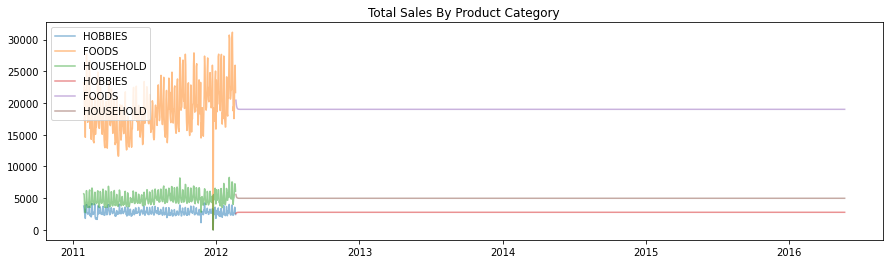

In [89]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(train.index, train['HOBBIES'], label='HOBBIES', alpha=0.5)
ax.plot(train.index, train['FOODS'], label='FOODS', alpha=0.5)
ax.plot(train.index, train['HOUSEHOLD'], label='HOUSEHOLD', alpha=0.5)
#ax.plot(valid.index, valid['HOBBIES'], label='Valid', alpha=0.5)
#ax.plot(valid.index, valid['FOODS'], label='Valid', alpha=0.5)
#ax.plot(valid.index, valid['HOUSEHOLD'], label='Valid', alpha=0.5)
ax.plot(pred.index, pred['HOBBIES'], label='HOBBIES', alpha=0.5)
ax.plot(pred.index, pred['FOODS'], label='FOODS', alpha=0.5)
ax.plot(pred.index, pred['HOUSEHOLD'], label='HOUSEHOLD', alpha=0.5)
plt.legend()
plt.title("Total Sales By Product Category")

In [94]:
model_fit.is_stable()

True

In [95]:
dir(model_fit)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bmat_forc_cov',
 '_char_mat',
 '_chol_sigma_u',
 '_cov_alpha',
 '_cov_sigma',
 '_forecast_vars',
 '_model_type',
 '_omega_forc_cov',
 '_zz',
 'acf',
 'acorr',
 'aic',
 'bic',
 'bse',
 'coefs',
 'coefs_exog',
 'cov_params',
 'cov_ybar',
 'dates',
 'detomega',
 'df_model',
 'df_resid',
 'endog',
 'endog_lagged',
 'exog',
 'exog_names',
 'fevd',
 'fittedvalues',
 'forecast',
 'forecast_cov',
 'forecast_interval',
 'fpe',
 'get_eq_index',
 'hqic',
 'info_criteria',
 'intercept',
 'intercept_longrun',
 'irf',
 'irf_errband_mc',
 'irf_resim',
 'is_stable',
 'k_ar',
 'k_exog',
 'k_exog_user',
 'k_trend',
 'llf',
 'long_run_eff

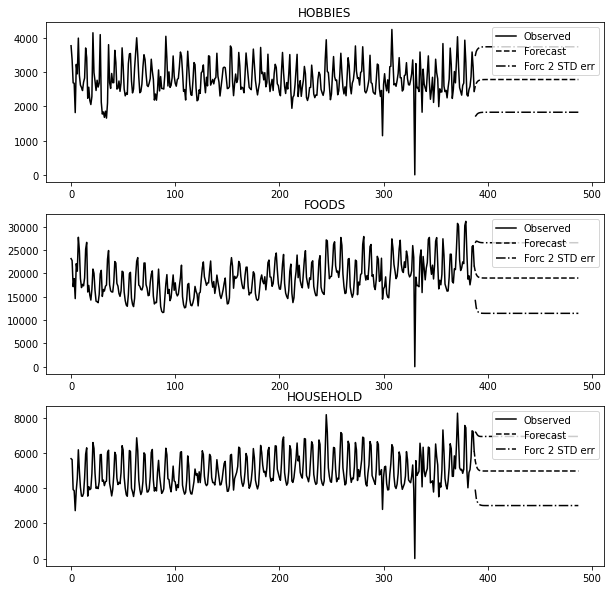

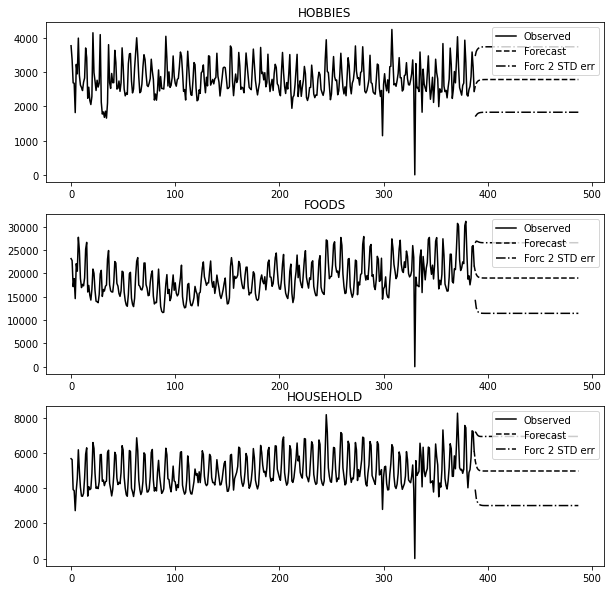

In [108]:
model_fit.plot_forecast(steps=100)

In [110]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_data_attr',
 '_estimate_var',
 '_fit_collinear',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_exog_names',
 '_get_index_label_loc',
 '_get_index_loc',
 '_get_init_kwds',
 '_get_prediction_index',
 '_handle_data',
 '_index',
 '_index_dates',
 '_index_freq',
 '_index_generated',
 '_index_inferred_freq',
 '_index_int64',
 '_index_none',
 '_init_dates',
 '_init_keys',
 '_kwargs_allowed',
 '_set_exog_names',
 'data',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'from_formula',
 'hessian',
 'information',
 'initialize',
 'k_constant',
 'k_trend',
 'loglike',
 'n_totobs',
 'neqs',
 'nobs',
 'pre

In [114]:
model.hessian(valid)

NotImplementedError: 

In [115]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Mar, 2022
Time:                     23:42:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    39.0867
Nobs:                     387.000    HQIC:                   39.0126
Log likelihood:          -9174.92    FPE:                8.35296e+16
AIC:                      38.9640    Det(Omega_mle):     8.09922e+16
--------------------------------------------------------------------
Results for equation HOBBIES
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const             2063.889687       139.300329           14.816           0.000
L1.HOBBIES           0.435058         0.071229            6.108           0.000
L1.FOODS            -0.039155         0.010584           -3.69